In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/245_HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/211_2HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/247_2HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/137_HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/72_HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/213_HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/253_HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/221_HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/78_HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/46_HC.png
/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set/120_HC.png


In [2]:
# %cd /content/sample_data
%cd /kaggle/working/

!mkdir training_images
!mkdir annotated_training_images

/kaggle/working


In [3]:
import shutil
import os

# %cd /content/sample_data/training_set
# Here, the path points to a dataset of fetal head ultrasound images located in the Kaggle environment.
%cd /kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/training_set/training_set
for filename in os.listdir():
    if filename.endswith('.jpg') or filename.endswith('.png'):
        if 'Annotation' in filename:
            shutil.copy(filename, '/kaggle/working/annotated_training_images')
        else:
            shutil.copy(filename, '/kaggle/working/training_images')

/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/training_set/training_set


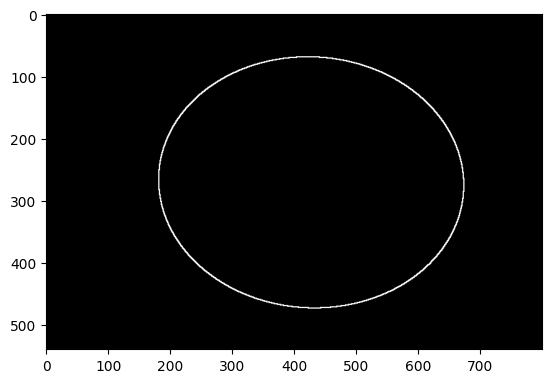

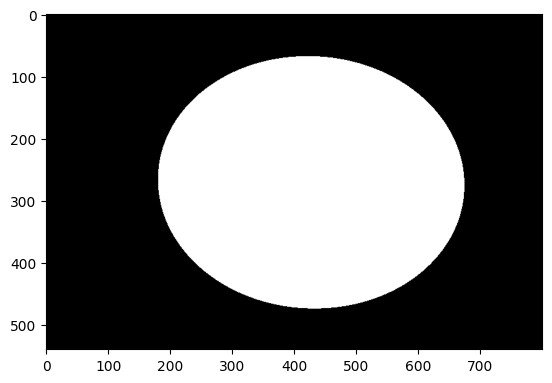

In [4]:
# The code reads a grayscale image (828_HC_Annotation.png) that is likely a mask or annotation image.
# It finds the contours (boundary points) of shapes in this image using cv2.findContours().
# Then, it draws the first detected contour onto the image, filling the contour area with white (255).

import cv2
mask1 = cv2.imread("/kaggle/working/annotated_training_images/828_HC_Annotation.png",0)

mask = cv2.imread("/kaggle/working/annotated_training_images/828_HC_Annotation.png",0)  
mask_contour= cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)       #  detects boundaries
mask_img = cv2.drawContours(mask,mask_contour[0],0,255, -1)      # draws boundary on an image


img = cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
# Show the image
plt.imshow(img)
plt.show()

img1 = cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()


torch.Size([1, 812, 812])


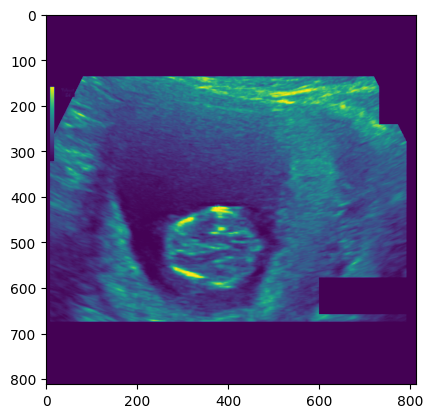

In [5]:
import numpy as np
from PIL import Image
from torchvision.io import read_image
import torch
import matplotlib.pyplot as plt

def pad_image_to_square(img):              # make the image 812x812


  channels, height, width = img.size()
  diff = abs(812-width)                # amount of pixels that need to be added to make the image’s width 812
 
  padding = diff // 2    # Determine the amount of padding to add on each side
  
  # to make it 812*812
  img = torch.nn.functional.pad(img, (padding, diff - padding, 0, 0), mode='constant', value=0)
  # print(img.shape)
  
  # print("hey" , img.size())

  channels, height, width = img.size()
  diff = abs(height-width)             #  amount of pixels that need to be added to make the image’s height 812
 
  padding = diff // 2   # Determine the amount of padding to add on each side


  # Pad the tensor with zeros along the height and width dimensions
# height is smaller than the width, padding is added to the top and bottom else added to left right
  if height < width:
      padded_image = torch.nn.functional.pad(img, (0, 0, padding, diff - padding), mode='constant', value=0)
  else:
      padded_image = torch.nn.functional.pad(img, (padding, diff - padding, 0, 0), mode='constant', value=0)


  return padded_image


# Open the rectangular image
img = read_image('/kaggle/working/training_images/100_2HC.png')


# Pad the image to make it square
padded_img = pad_image_to_square(img)
print(padded_img.shape)

tensor_image = padded_img.permute(1, 2, 0)
plt.imshow(tensor_image)
plt.show()


In [6]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms
# from PIL import Image
# import cv2
# import os
# import pandas as pd
# from torchvision.io import read_image


# class CustomDataset(Dataset):
#     def __init__(self, img_path, target_path, transform , target_transform):
#         self.img_path = img_path
#         self.target_path = target_path
#         self.transform = transform
#         self.target_transform = target_transform


#     def __len__(self):
#         return len(os.listdir(self.img_path))

#     def __getitem__(self, index):
#          # The code generates the full file path to the image located at the specified index in the sorted list of files
#         img_path = os.path.join(self.img_path, sorted(os.listdir(self.img_path))[index])
#         img = read_image(img_path)   
#         img = pad_image_to_square(img)

#         if self.target_path:
#           img_path_tar = os.path.join(self.target_path, sorted(os.listdir(self.target_path))[index])

#           target = cv2.imread(img_path_tar , 0)
#           mask_contour= cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#           cv2.drawContours(target,mask_contour[0],0,255, -1)
#           target = target[np.newaxis, :, :]                   # add a new axis (1, height, width)
#           target = torch.from_numpy(target)
#           target = pad_image_to_square(target)
#         else :
#           target = torch.tensor([])
          

#         if self.transform:
#             img = self.transform(img)
#         if self.target_transform:
#             # print("target", target.shape, type(target))
#             target = self.target_transform(target)
#             target = torch.where(target > 128, torch.tensor([1.0]), torch.tensor([0.0]))  # This binarizes the target tensor

#         return img.float(), target.float()



# # Define the transformation to resize the images to 64x64 pixels
# transform = transforms.Compose([
#     transforms.Resize((252, 252))   #original size in paper 572 , 572
#     # transforms.ToTensor()
# ])

# transform1 = transforms.Compose([
#     transforms.Resize((68, 68))   # original size in paper 388 , 388'

# ])
# # Instantiate dataset object
# dataset = CustomDataset(

#     img_path = '/kaggle/working/training_images' ,
#     target_path = '/kaggle/working/annotated_training_images' ,
#     transform=transform , 
#     target_transform = transform1 )

# test_dataset = CustomDataset(
#     img_path = '/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set' ,
#     target_path = None ,
#     transform=transform , 
#     target_transform = None
#     )

# # justto check number of images
# img_path = '/kaggle/working/training_images'
# print(len(os.listdir(img_path)))
# target_path = '/kaggle/working/annotated_training_images'
# print(len(os.listdir(target_path)))


# import torch.utils.data as data
# train_dataset, val_dataset = data.random_split(dataset, [799, 200])


# # Create train and validation dataloaders
# train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True) #,worker_init_fn=lambda _: random.seed(42))
# val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False) #,worker_init_fn=lambda _: random.seed(42))

# test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False) #,worker_init_fn=lambda _: random.seed(42))


<font color= "yellow"> <h2> Updated Dataloader

In [24]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import cv2
import os
import pandas as pd
from torchvision.io import read_image
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, img_path, target_path, transform=None, target_transform=None):
        self.img_path = img_path
        self.target_path = target_path
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(os.listdir(self.img_path))

    def __getitem__(self, index):
        # Load image
        img_path = os.path.join(self.img_path, sorted(os.listdir(self.img_path))[index])
        img = read_image(img_path)
        img = pad_image_to_square(img)

        # Load and process target mask if available
        if self.target_path:
            img_path_tar = os.path.join(self.target_path, sorted(os.listdir(self.target_path))[index])
            target = cv2.imread(img_path_tar, 0)
            mask_contour = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(target, mask_contour[0], 0, 255, -1)
            target = target[np.newaxis, :, :]  # Add a new axis (1, height, width)
            target = torch.from_numpy(target)
            target = pad_image_to_square(target)
        else:
            target = torch.tensor([])

        # Apply transforms
        if self.transform:
            img = self.transform(img)
        if self.target_transform:
            target = self.target_transform(target)
            target = torch.where(target > 128, torch.tensor([1.0]), torch.tensor([0.0]))  # Binarize the target

        return img.float(), target.float()

# Function to pad images to square if necessary
def pad_image_to_square(image):
    c, h, w = image.shape
    if h == w:
        return image
    dim_diff = np.abs(h - w)
    pad1, pad2 = dim_diff // 2, dim_diff - dim_diff // 2
    if h > w:
        return torch.nn.functional.pad(image, (pad1, pad2, 0, 0), mode='constant', value=0)
    else:
        return torch.nn.functional.pad(image, (0, 0, pad1, pad2), mode='constant', value=0)

# Define transformations for both images and masks
transform = transforms.Compose([
    transforms.Resize((128, 128))
])

transform1 = transforms.Compose([
    transforms.Resize((128, 128))
])

# Instantiate dataset objects
dataset = CustomDataset(
    img_path='/kaggle/working/training_images',
    target_path='/kaggle/working/annotated_training_images',
    transform=transform,
    target_transform=transform1
)

test_dataset = CustomDataset(
    img_path='/kaggle/input/fetal-head-ultrasound-dataset-for-image-segment/test_set/test_set',
    target_path=None,
    transform=transform,
    target_transform=None
)

# Create train/validation split
import torch.utils.data as data
train_dataset, val_dataset = data.random_split(dataset, [799, 200])

# Create train, validation, and test dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)


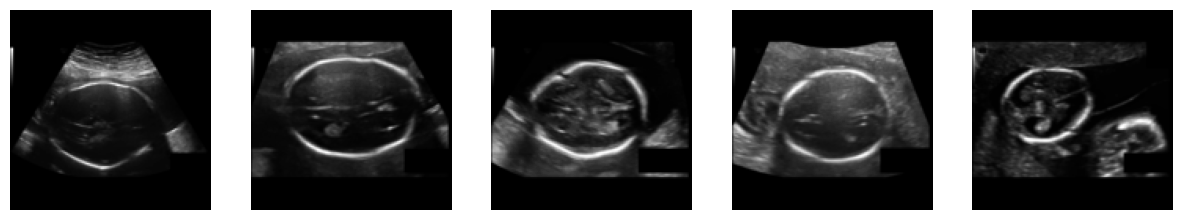

In [25]:
import matplotlib.pyplot as plt
import torch
i = 0
import itertools
for i, batch in enumerate(train_dataloader):
  if i == 1:
      break

  # Plot each image in a separate subplot
  fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
  for i in range(5):
      axs[i].imshow(batch[0][i, 0], cmap='gray')
      axs[i].axis('off')
  plt.show()
  i+=1

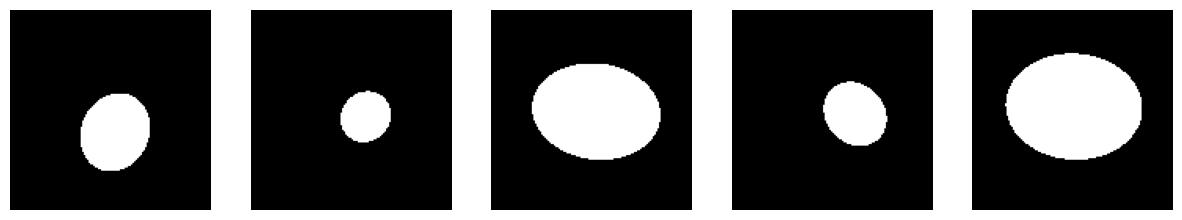

In [26]:
import matplotlib.pyplot as plt
import torch
i = 0
import itertools
for i, batch in enumerate(train_dataloader):
  if i == 1:
      break
  # print(f"Batch {i+1}: {batch}")

  # Plot each image in a separate subplot
  fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
  for i in range(5):
      axs[i].imshow(batch[1][i, 0], cmap='gray')
      axs[i].axis('off')
  plt.show()
  i+=1

In [27]:
# import torch 
# import torch.nn as nn
# import torch.nn.functional as F

# def scale_tensor(image ,new_height , new_width):
#   scaled_image = F.interpolate(image, size=(new_height, new_width), mode='bilinear', align_corners=True) # resize tensors
#   return scaled_image


# #double 3x3 convolution 
# def dual_conv(in_channel, out_channel):
#     conv = nn.Sequential(
#         nn.BatchNorm2d(in_channel),
#         nn.Conv2d(in_channel, out_channel, kernel_size=3),
#         nn.BatchNorm2d(out_channel),
#         nn.ReLU(inplace= True),
#         nn.Conv2d(out_channel, out_channel, kernel_size=3),
#         nn.BatchNorm2d(out_channel),
#         nn.ReLU(inplace= True),
#     )
#     return conv


# # This function crops the input tensor so that its spatial dimensions match the dimensions of the target_tensor
# # as shown in architecture image , half left side image is concated with right side image (skip connections !)
# def crop_tensor(target_tensor, tensor):
#     target_size = target_tensor.size()[2]
#     tensor_size = tensor.size()[2]
#     delta = tensor_size - target_size
#     delta = delta // 2

#     return tensor[:, :, delta:tensor_size- delta, delta:tensor_size-delta]

# def out_layer(in_channel , out_channel):
#   conv_layer = nn.Sequential(
#       nn.Conv2d(in_channels=in_channel, out_channels=out_channel, kernel_size=1),
#       nn.BatchNorm2d(out_channel),
#       nn.Sigmoid()
#   )
#   return conv_layer

# class Unet(nn.Module):
#     def __init__(self):
#         super(Unet, self).__init__()

#         # Left side (contracting path)
#         self.dwn_conv1 = dual_conv(1, 64)
#         self.dwn_conv2 = dual_conv(64, 128)
#         self.dwn_conv3 = dual_conv(128, 256)
#         self.dwn_conv4 = dual_conv(256, 512)
#         self.dwn_conv5 = dual_conv(512, 1024)
#         self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

#         #Right side  (expnsion path) 
#         #transpose convolution is used showna as green arrow in architecture image
#         self.conv_bn=nn.BatchNorm2d(1024)

#         self.trans1 = nn.ConvTranspose2d(1024,512, kernel_size=2, stride= 2)
#         self.up_conv1 = dual_conv(1024,512)
#         self.trans2 = nn.ConvTranspose2d(512,256, kernel_size=2, stride= 2)
#         self.up_conv2 = dual_conv(512,256)
#         self.trans3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride= 2)
#         self.up_conv3 = dual_conv(256,128)
#         self.trans4 = nn.ConvTranspose2d(128,64, kernel_size=2, stride= 2)
#         self.up_conv4 = dual_conv(128,64)

#         #output layer
#         # self.out = nn.Conv2d(64, 1, kernel_size=1) 
#         self.out = out_layer(64 , 1)

#     def forward(self, image):

#         #Padding the image to make it sqare
#         # image = pad_image_to_square(image)
#         #forward pass for Left side
        
#         x1 = self.dwn_conv1(image)
#         x2 = self.maxpool(x1)
        
#         x3 = self.dwn_conv2(x2)
#         x4 = self.maxpool(x3)
        
#         x5 = self.dwn_conv3(x4)
#         x6 = self.maxpool(x5)
        
#         x7 = self.dwn_conv4(x6)
#         x8 = self.maxpool(x7)
        
#         x9 = self.dwn_conv5(x8)
        

#         #forward pass for Right side
#         x_norm = self.conv_bn(x9)
        
#         x = self.trans1(x_norm)
#         y = crop_tensor(x, x7)
#         x = self.up_conv1(torch.cat([x,y], 1))

#         x = self.trans2(x)
#         y = crop_tensor(x, x5)
#         x = self.up_conv2(torch.cat([x,y], 1))

#         x = self.trans3(x)
#         y = crop_tensor(x, x3)
#         x = self.up_conv3(torch.cat([x,y], 1))

#         x = self.trans4(x)
#         y = crop_tensor(x, x1)
#         x = self.up_conv4(torch.cat([x,y], 1))
        
#         x = self.out(x)

        
#         return x


<font color="yellow"> <h2> Updated U-Net

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Rescaling tensor function
def scale_tensor(image, new_height, new_width):
    scaled_image = F.interpolate(image, size=(new_height, new_width), mode='bilinear', align_corners=True)
    return scaled_image

# Double 2x2 convolution
def dual_conv(in_channel, out_channel):
    conv = nn.Sequential(
        nn.Conv2d(in_channel, out_channel, kernel_size=2, stride=1),  # 2x2 convolution
        nn.BatchNorm2d(out_channel),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channel, out_channel, kernel_size=2, stride=1),  # 2x2 convolution
        nn.BatchNorm2d(out_channel),
        nn.ReLU(inplace=True),
    )
    return conv

# Cropping function to ensure dimensions match
def crop_tensor(target_tensor, tensor_to_match):
    target_size = target_tensor.size()[2:]
    tensor_size = tensor_to_match.size()[2:]
    
    diffY = (target_size[0] - tensor_size[0]) // 2
    diffX = (target_size[1] - tensor_size[1]) // 2
    
    cropped_tensor = target_tensor[:, :, diffY:diffY + tensor_size[0], diffX:diffX + tensor_size[1]]
    return cropped_tensor

# Output layer
def out_layer(in_channel, out_channel):
    conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=in_channel, out_channels=out_channel, kernel_size=1),
        nn.BatchNorm2d(out_channel),
        nn.Sigmoid()
    )
    return conv_layer


class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        
        # (Rest of your architecture code remains the same)
        # Left side (contracting path)
        self.dwn_conv1 = dual_conv(1, 50)     # 50 filters
        self.dwn_conv2 = dual_conv(50, 100)   # 100 filters
        self.dwn_conv3 = dual_conv(100, 200)  # 200 filters
        self.dwn_conv4 = dual_conv(200, 500)  # 500 filters
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Right side (expansion path)
        self.conv_bn = nn.BatchNorm2d(500)

        # Transposed convolutions with kernel size 3 and adjustments
        self.trans1 = nn.ConvTranspose2d(500, 200, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.up_conv1 = dual_conv(400, 200)
        self.trans2 = nn.ConvTranspose2d(200, 100, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.up_conv2 = dual_conv(200, 100)
        self.trans3 = nn.ConvTranspose2d(100, 50, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.up_conv3 = dual_conv(100, 50)
        self.trans4 = nn.ConvTranspose2d(50, 50, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.up_conv4 = dual_conv(50, 50)

        # Output layer
        self.out = out_layer(50, 1)

    def forward(self, image):
        # Forward pass for left side (contracting path)
        x1 = self.dwn_conv1(image)
        x2 = self.maxpool(x1)

        x3 = self.dwn_conv2(x2)
        x4 = self.maxpool(x3)

        x5 = self.dwn_conv3(x4)
        x6 = self.maxpool(x5)

        x7 = self.dwn_conv4(x6)

        # Forward pass for right side (expansion path)
        x_norm = self.conv_bn(x7)

        # Upsampling and concatenating with cropped tensors from the contracting path
        x = self.trans1(x_norm)

        # Ensure sizes match before concatenation
        x5_scaled = scale_tensor(x5, x.size(2), x.size(3))
        x = self.up_conv1(torch.cat([x, x5_scaled], 1))

        x = self.trans2(x)
        x3_scaled = scale_tensor(x3, x.size(2), x.size(3))
        x = self.up_conv2(torch.cat([x, x3_scaled], 1))

        x = self.trans3(x)
        x1_scaled = scale_tensor(x1, x.size(2), x.size(3))
        x = self.up_conv3(torch.cat([x, x1_scaled], 1))

        x = self.trans4(x)
        x = self.up_conv4(x)

        # Resize the final output to match the target size
        x = F.interpolate(x, size=(128, 128), mode='bilinear', align_corners=True)

        # Pass through output layer
        x = self.out(x)

        return x


In [35]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# from dataset import MyDataset
# from model import UNet

torch.cuda.empty_cache()

import gc
# del inputs , targets , model
gc.collect()



# Define hyperparameters
# batch_size = 2
learning_rate = 0.001
num_epochs = 10



# Define the U-Net architecture
model = Unet()
if torch.cuda.is_available():
  model.cuda()

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

v_loss , train_loss = [] , []
# Train the U-Net
for epoch in range(num_epochs):
  model.train()
  for batch_idx, (inputs, targets) in enumerate(train_dataloader):
      # Forward pass
      inputs = inputs.to(device)   #
      targets = targets.to(device)#

      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  # Evaluate the U-Net on the validation set
  with torch.no_grad():
    model.eval()
    val_loss = 0
    for inputs, targets in val_dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)
        val_loss += criterion(outputs, targets)
    val_loss /= len(val_dataloader)
  v_loss.append(val_loss.item())
  train_loss.append(loss.item())
  # Print the loss for the current epoch
  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}  , Val Loss: {val_loss.item():.4f}")

# Save the trained model
# torch.save(model.state_dict(), 'path/to/trained/model')


Epoch [1/10], Train Loss: 0.7792  , Val Loss: 0.7870
Epoch [2/10], Train Loss: 0.7749  , Val Loss: 0.7790
Epoch [3/10], Train Loss: 0.7705  , Val Loss: 0.7694
Epoch [4/10], Train Loss: 0.7488  , Val Loss: 0.7628
Epoch [5/10], Train Loss: 0.7212  , Val Loss: 0.7495
Epoch [6/10], Train Loss: 0.7374  , Val Loss: 0.7461
Epoch [7/10], Train Loss: 0.7362  , Val Loss: 0.7378
Epoch [8/10], Train Loss: 0.7321  , Val Loss: 0.7376
Epoch [9/10], Train Loss: 0.7169  , Val Loss: 0.7257
Epoch [10/10], Train Loss: 0.7257  , Val Loss: 0.7215


In [37]:
def dice_coefficient(y_pred, y_true):
    smooth = 0.001
    y_pred = y_pred.view(-1)
    # print(type(y_pred), y_pred.shape)
    y_true = y_true.view(-1)
    intersection = torch.sum(y_pred * y_true)
    dice = (2.0 * intersection + smooth) / (torch.sum(y_pred) + torch.sum(y_true) + smooth)
    return dice

def dice_score(y_pred_batch, y_true_batch):
    dice_scores = torch.zeros(y_pred_batch.shape[0])
    for i in range(y_pred_batch.shape[0]):
        dice_scores[i] = dice_coefficient(y_pred_batch[i], y_true_batch[i])
    return dice_scores

with torch.no_grad():
  dice_com = torch.tensor([])
  model.to(device)
  model.eval()
  val_loss = 0
  for inputs, targets in val_dataloader:
      inputs = inputs.to(device)
      targets = targets.to(device)#

      outputs = model(inputs)
      outputs = torch.where(outputs > 0.5, torch.tensor([1.0]).to(device), torch.tensor([0.0]).to(device))
      dice = dice_score(outputs, targets)
      dice_com = torch.cat((dice_com, dice))

print("Dice Score of Validation Set")
dice_com.mean().item()

Dice Score of Validation Set


0.9489806890487671

Text(0, 0.5, 'loss')

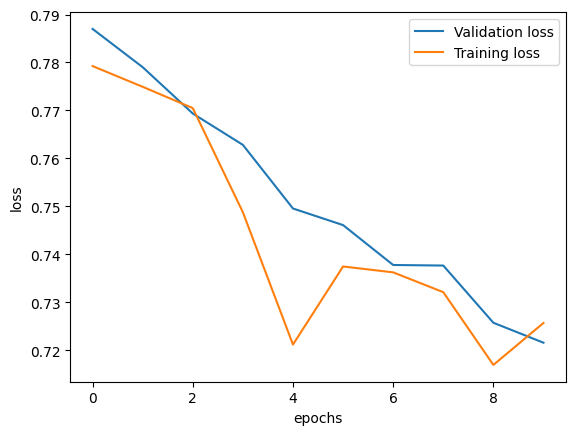

In [38]:
import matplotlib.pyplot as plt
plt.plot(v_loss)
plt.plot(train_loss)
plt.legend(["Validation loss" , "Training loss"])
plt.xlabel("epochs")
plt.ylabel("loss")

In [39]:
# # Save the trained model
# torch.save(model.state_dict(), '/content/drive/MyDrive/ML-Assign-6/model1.pt')
# # model.load_state_dict(torch.load(model_path))

In [40]:
# model = Unet()
# if torch.cuda.is_available():
#   model.cuda()
# model.load_state_dict(torch.load('/content/drive/MyDrive/ML-Assign-6/model.pt'))

In [41]:
import torch
torch.cuda.empty_cache()
# del model 
import gc
gc.collect()

28

In [42]:
import itertools
# Get the first 2 batches
top_2_batches = list(itertools.islice(test_dataloader, 2))

out = []
test = []
test1 = []
# Process the batches
with torch.no_grad():
  for batch in top_2_batches:
      # Do something with the batch

      inputs = batch[0].to(device)   #

      test.append(inputs)
      test1.append(batch[1].to(device))

      outputs = model(inputs)
      out.append(outputs)

      torch.cuda.empty_cache()
      gc.collect()
      print(batch[0].shape)
  

torch.Size([16, 1, 128, 128])
torch.Size([16, 1, 128, 128])


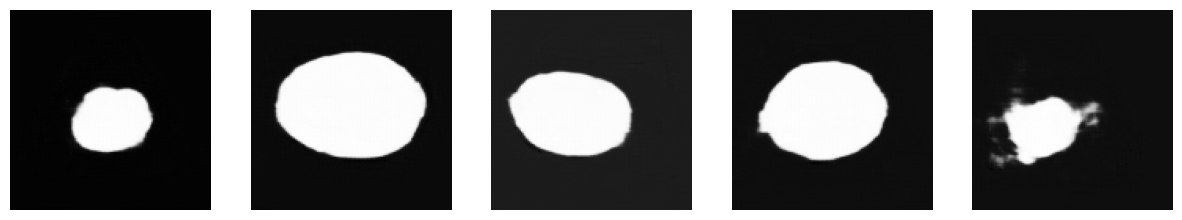

In [43]:
import matplotlib.pyplot as plt
import torch

# Create a tensor of size [5, 1, 628, 628] (replace with your own tensor)
tensor = out[0].cpu().detach().numpy()

# Plot each image in a separate subplot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5):
    axs[i].imshow(tensor[i, 0], cmap='gray')
    axs[i].axis('off')
plt.show()

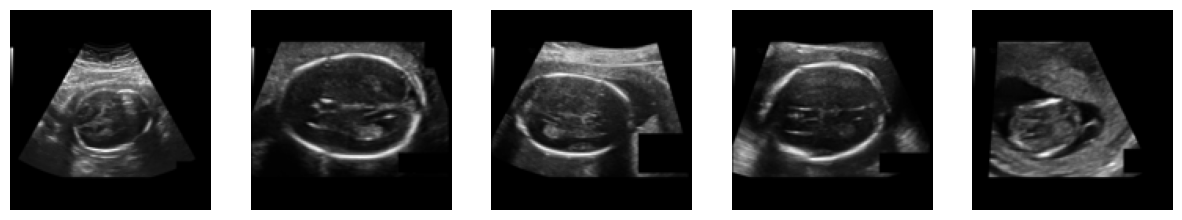

In [44]:
import matplotlib.pyplot as plt
import torch

# Create a tensor of size [5, 1, 628, 628] (replace with your own tensor)
tensor_train = test[0].cpu().detach().numpy()

# Plot each image in a separate subplot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5):
    axs[i].imshow(tensor_train[i, 0], cmap='gray')
    axs[i].axis('off')
plt.show()